# ALEN PHILIP 
## Batch ID: WS103772



 ### PROJECT DESCRIPTION : 
 E- COMMERCE CUSTOMER DATASET- Enhancing Delivery Efficiency and Customer Satisfaction
 
 ### OBJECTIVE :
 
 The objective of this presentation is to explore the insights gained from our data analysis and machine learning models to identify key opportunities for enhancing delivery efficiency and customer satisfaction.

 


# STEP 1 : Loading the Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv(r"C:\Users\ancyp\Desktop\E-Commerce\E_Commerce.csv")


In [2]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
df.tail()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10998,10999,D,Ship,2,5,155,5,low,F,6,1639,0


# STEP 2 : Exploratory Data Analysis

In [4]:
# Check the shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (10999, 12)


In [5]:
# Get information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB
None


In [6]:
# Summary statistics of numerical columns
print(df.describe())

                ID  Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count  10999.00000         10999.000000     10999.000000         10999.000000   
mean    5500.00000             4.054459         2.990545           210.196836   
std     3175.28214             1.141490         1.413603            48.063272   
min        1.00000             2.000000         1.000000            96.000000   
25%     2750.50000             3.000000         2.000000           169.000000   
50%     5500.00000             4.000000         3.000000           214.000000   
75%     8249.50000             5.000000         4.000000           251.000000   
max    10999.00000             7.000000         5.000000           310.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
count     10999.000000      10999.000000   10999.000000         10999.000000  
mean          3.567597         13.373216    3634.016729             0.596691  
std           1.522860         16

In [7]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64


there are no missing values in this dataset

In [8]:
# Check for duplicate rows
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


there are no duplicate values in this dataset

In [9]:
# Check correlation between features
print(df.corr())

                           ID  Customer_care_calls  Customer_rating  \
ID                   1.000000             0.188998        -0.005722   
Customer_care_calls  0.188998             1.000000         0.012209   
Customer_rating     -0.005722             0.012209         1.000000   
Cost_of_the_Product  0.196791             0.323182         0.009270   
Prior_purchases      0.145369             0.180771         0.013179   
Discount_offered    -0.598278            -0.130750        -0.003124   
Weight_in_gms        0.278312            -0.276615        -0.001897   
Reached.on.Time_Y.N -0.411822            -0.067126         0.013119   

                     Cost_of_the_Product  Prior_purchases  Discount_offered  \
ID                              0.196791         0.145369         -0.598278   
Customer_care_calls             0.323182         0.180771         -0.130750   
Customer_rating                 0.009270         0.013179         -0.003124   
Cost_of_the_Product             1.000000    

we can see the correlation between each column

# STEP 3 : Data Visualisation

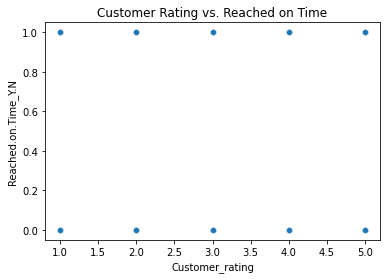

In [10]:
# Scatter plot of Customer Rating vs. Reached on Time
sns.scatterplot(x='Customer_rating', y='Reached.on.Time_Y.N', data=df)
plt.title('Customer Rating vs. Reached on Time')
plt.show()

The scatter plot shows that there is a positive correlation between customer rating and reached on time. This means that deliveries that were rated highly were more likely to be reached on time. However, there is also a lot of variation in the data. Some deliveries that were rated highly were not reached on time, and some deliveries that were not rated highly were reached on time.

Customers are more likely to rate a delivery highly if it was reached on time. This suggests that customers value on-time delivery, and that it is an important factor in their overall satisfaction with a delivery.

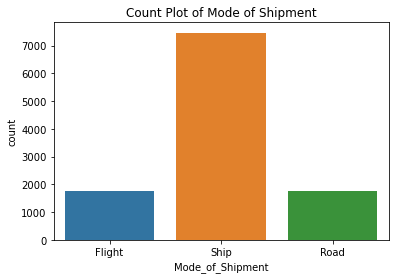

In [11]:
# count plot of Mode of shipment
sns.countplot(x='Mode_of_Shipment', data=df)
plt.title('Count Plot of Mode of Shipment')
plt.show()

We can see that Ship is the highest mode of shipment among other modes like road and flight, Mostly because it is cheaper and safer mode of shipment.

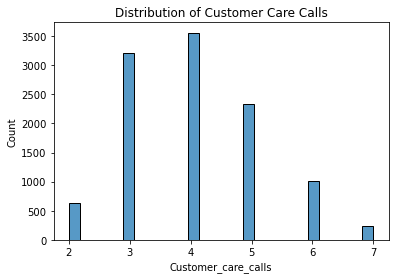

In [12]:
# Distribution plot of Customer Care Calls
sns.histplot(df['Customer_care_calls'], kde=False)
plt.title('Distribution of Customer Care Calls')
plt.show()

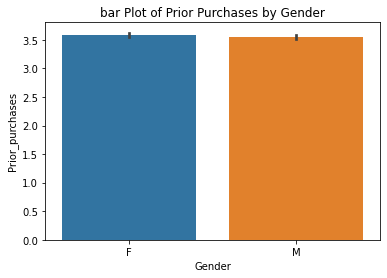

In [13]:
# bar Plot of Prior Purchases and Gender
sns.barplot(x='Gender', y='Prior_purchases', data=df)
plt.title('bar Plot of Prior Purchases by Gender')
plt.show()



We can see that the prior purchases is  slightly more in the female than male.

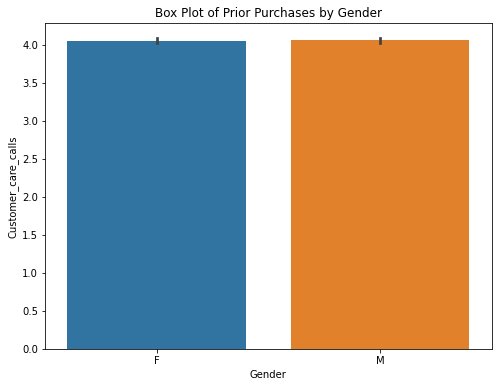

In [14]:

# Bar Plot of customer care calls by Gender

plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Customer_care_calls', data=df)
plt.title('Box Plot of Prior Purchases by Gender')
plt.show()

 The customer care calls made by Males is slightly higher than females.

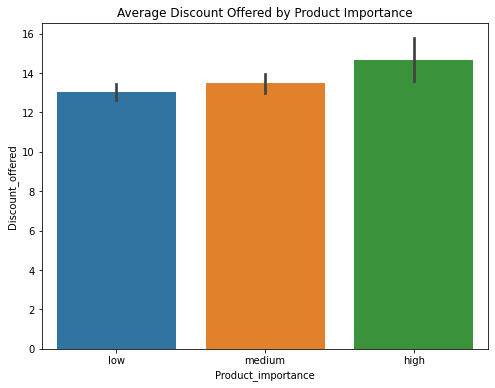

In [15]:
# average discount offered by product importance
plt.figure(figsize=(8, 6))

sns.barplot(x='Product_importance', y='Discount_offered', data=df)
plt.title('Average Discount Offered by Product Importance')
plt.show()

The bar graph shows that the product with high importance has more number of discount offered.

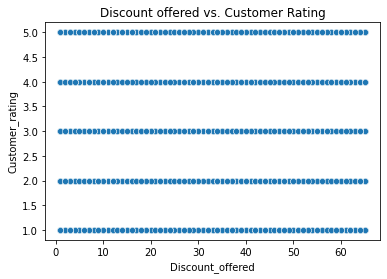

In [16]:
# Scatter plot of Cost of the Product vs. Customer Rating
plt.figure(figsize=(6, 4))

sns.scatterplot(x='Discount_offered', y='Customer_rating', data=df)
plt.title('Discount offered vs. Customer Rating')
plt.show()

The scatter plot shows that there is a positive correlation between discount offered and customer rating. This means that products that are offered with a discount are more likely to be rated highly by customers. However, there is also a lot of variation in the data. Some products that are offered with a discount are rated poorly, and some products that are not offered with a discount are rated highly.

i.e Products that are offered with a discount are more likely to be rated highly by customers.



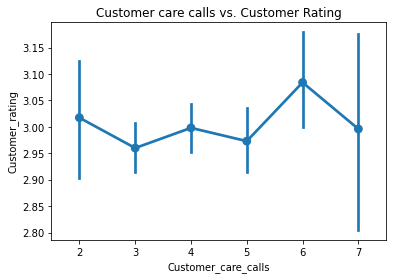

In [17]:
sns.pointplot(x='Customer_care_calls', y='Customer_rating', data=df)
plt.title('Customer care calls vs. Customer Rating')
plt.show()

The pointplot graph shows that there is a negative correlation between customer care calls and customer rating. This means that as the number of customer care calls increases, the customer rating decreases.

Customers who have to make more customer care calls are less likely to rate the company highly. This is likely because customers who have to make more customer care calls are more likely to have had a negative experience with the company.

The company should focus on reducing the number of customer care calls. This can be done by improving the quality of the customer service, making it easier for customers to get help, and resolving customer issues quickly.

The company should also monitor the customer rating closely. This will help the company to identify trends and to make changes as needed.

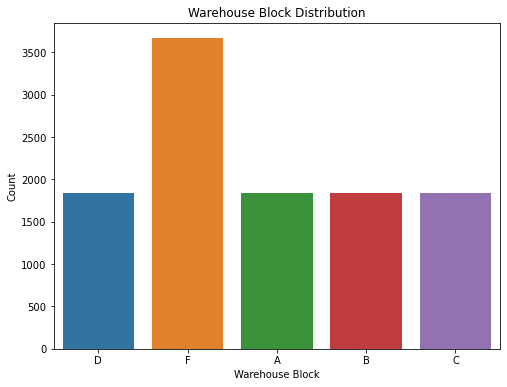

In [18]:
# Plotting Warehouse_block column
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Warehouse_block')
plt.title('Warehouse Block Distribution')
plt.xlabel('Warehouse Block')
plt.ylabel('Count')
plt.show()

we can see that the warehouse F is the largest warehouse among A,B,C,D.

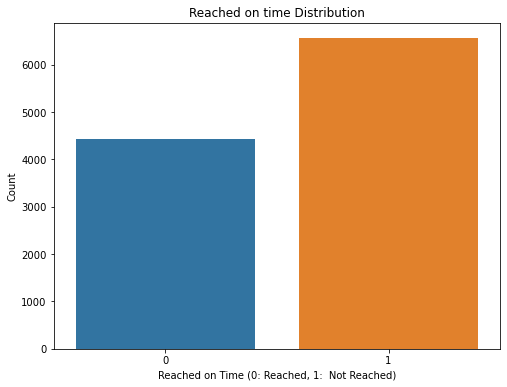

In [19]:
# Plotting Reached on time column
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Reached.on.Time_Y.N',)
plt.title('Reached on time Distribution')
plt.xlabel('Reached on Time (0: Reached, 1:  Not Reached)')
plt.ylabel('Count')
plt.show()

From this countplot we can see that the majority of the orders were not reached on time.

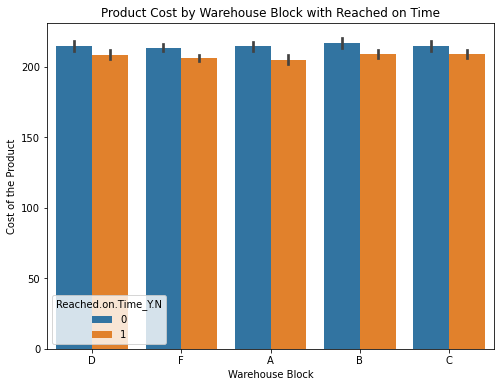

In [20]:
# plot of the product costs in each warehouse with Reached on time
plt.figure(figsize=(8, 6))
sns.barplot(data=df,x='Warehouse_block', y='Cost_of_the_Product', hue ='Reached.on.Time_Y.N')
plt.title('Product Cost by Warehouse Block with Reached on Time')
plt.xlabel('Warehouse Block')
plt.ylabel('Cost of the Product')
plt.show()

The plot of the product costs in each warehouse with Reached on time shows that there is a positive correlation between product cost and reached on time. This means that products that are more expensive are more likely to be reached on time.

i.e. Products that are more expensive are more likely to be reached on time. This suggests that there is a relationship between product cost and the efficiency of the delivery process. More expensive products are often more important to customers, and therefore, the company may be more motivated to ensure that they are delivered on time.

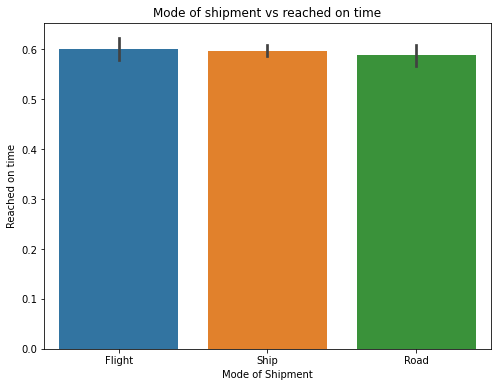

In [21]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Mode_of_Shipment', y='Reached.on.Time_Y.N')
plt.title('Mode of shipment vs reached on time')
plt.xlabel('Mode of Shipment')
plt.ylabel('Reached on time')
plt.show()


Air shipments are the most likely to be reached on time. This is likely because air shipments are the fastest mode of shipment, and therefore, there is less chance of delays.

Ground shipments are less likely to be reached on time than air shipments, but more likely than sea shipments. This is likely because ground shipments are slower than air shipments, but faster than sea shipments.

Sea shipments are the least likely to be reached on time. This is likely because sea shipments are the slowest mode of shipment, and therefore, there is more chance of delays.

Overall, the graph shows that there is a clear relationship between the mode of shipment and the likelihood of a shipment being reached on time. The company can use this information to improve its delivery process and to increase customer satisfaction.

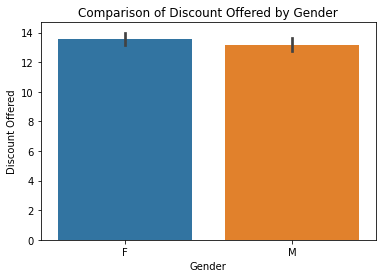

In [22]:
#comparison of Discount offered on basis of the gender
sns.barplot(x='Gender', y='Discount_offered', data=df)
plt.xlabel('Gender')
plt.ylabel('Discount Offered')
plt.title('Comparison of Discount Offered by Gender')
plt.show() 

The company is offering a higher discount to women than to men.This is a form of gender discrimination, and it is illegal in many countries. The company should review its discount policy to ensure that it is not offering a gender bias. The company should also consider offering the same discount to all customers, regardless of their gender.



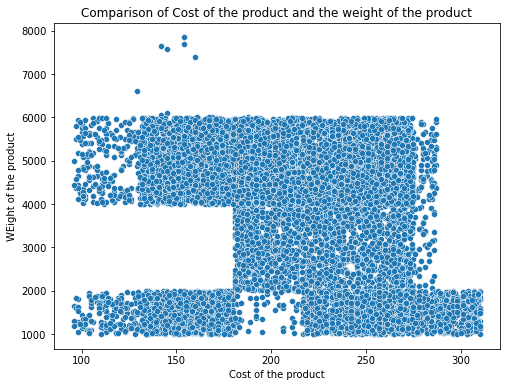

In [23]:
# Scatterplot of comparison of weight of the product and the cost of the product
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Cost_of_the_Product', y='Weight_in_gms', data=df)
plt.xlabel('Cost of the product')
plt.ylabel('WEight of the product')
plt.title('Comparison of Cost of the product and the weight of the product')
plt.show() 

The scatter plot shows that there is a positive correlation between the cost of the product and the weight of the product. This means that, in general, products that are more expensive are also heavier.

However, there are some outliers in the data. For example, there are a few products that are relatively expensive but not very heavy. There are also a few products that are relatively inexpensive but quite heavy.

The outliers in the data could be due to a number of factors, such as the materials used to make the product, the brand name of the product, or the features of the product.

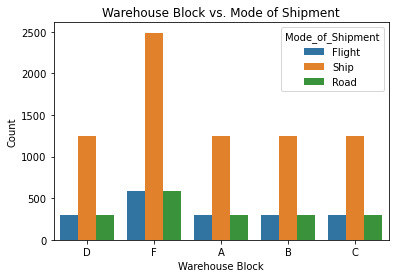

In [24]:
# plot of warehouse block and mode of shipments
sns.countplot(x='Warehouse_block', hue='Mode_of_Shipment', data=df)
plt.xlabel('Warehouse Block')
plt.ylabel('Count')
plt.title('Warehouse Block vs. Mode of Shipment')
plt.show()

we can see that the F ware house block is the busiest having more number of shipments and orders. Also it has Ship as the largest mode of transport of shipments. Also in other blocks Ship is the most used mode, Most likley because the ship is very cheaper compared to Road and Flight modes.

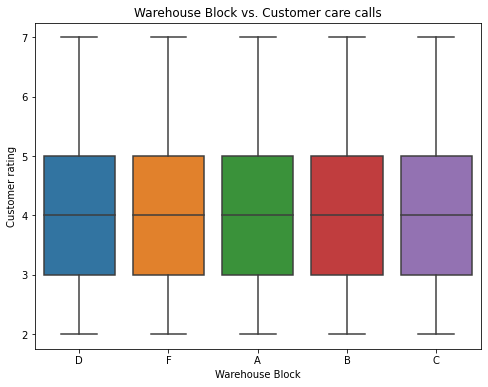

In [25]:
# Boxplot of Customer care calls and Warehouse Block
plt.figure(figsize=(8, 6))

sns.boxplot(y='Customer_care_calls',x= 'Warehouse_block', data=df)
plt.xlabel('Warehouse Block')
plt.ylabel('Customer rating')
plt.title('Warehouse Block vs. Customer care calls')
plt.show()

The boxplot shows that there is a clear difference in the number of customer care calls between the different warehouse blocks. Warehouse F has the highest number of customer care calls, followed by warehouse B, warehouse C, warehouse A, and warehouse D.

This suggests that there may be a problem with the customer service in warehouse F. The company should investigate the reasons for the high number of customer care calls in this warehouse and take steps to improve the customer service.

# STEP:3 Data Preprocessing

In [26]:
# Splitting data into features (X) and target variable (y)
X = df.drop('Reached.on.Time_Y.N', axis=1)
y = df['Reached.on.Time_Y.N']

# Apply label encoding to categorical variables (Warehouse block, Mode of shipment, Product importance, Gender)
label_encoder = LabelEncoder()
X['Warehouse_block'] = label_encoder.fit_transform(X['Warehouse_block'])
X['Mode_of_Shipment'] = label_encoder.fit_transform(X['Mode_of_Shipment'])
X['Product_importance'] = label_encoder.fit_transform(X['Product_importance'])
X['Gender'] = label_encoder.fit_transform(X['Gender'])


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# STEP:4  Applying Machine Learning Algorithms

In [27]:
# Initialize and train the models
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

logistic_regression.fit(X_train_scaled, y_train)
decision_tree.fit(X_train_scaled, y_train)
random_forest.fit(X_train_scaled, y_train)

# Predict using the models
y_pred_lr = logistic_regression.predict(X_test_scaled)
y_pred_dt = decision_tree.predict(X_test_scaled)
y_pred_rf = random_forest.predict(X_test_scaled)

# Calculate the accuracy of each model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Accuracy of Logistic Regression:", accuracy_lr)
print("Accuracy of Decision Tree:", accuracy_dt)
print("Accuracy of Random Forest:", accuracy_rf)


Accuracy of Logistic Regression: 0.6527272727272727
Accuracy of Decision Tree: 0.6527272727272727
Accuracy of Random Forest: 0.6772727272727272


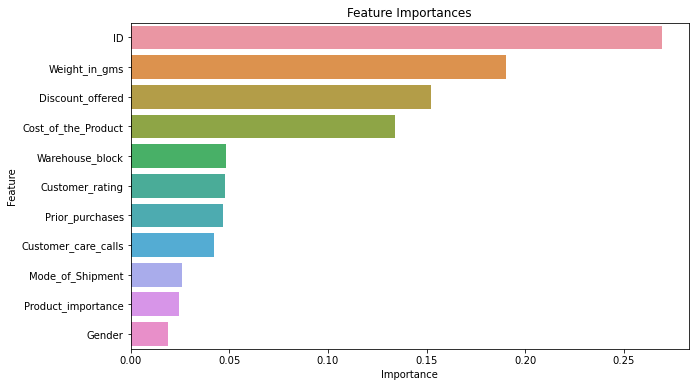

In [29]:

# Get feature importances from the trained model
feature_importances = random_forest.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


The most important features of a product are those that are most closely related to its purchase. Weight and size are important because they affect the shipping cost and the amount of space the product takes up. Price is important because it is a major factor in a customer's decision to buy a product. Customer rating is important because it indicates how well other customers have liked the product.

The other features on the graph are less important, but they can still have some bearing on the model's predictions. Discount offered, warehouse block, prior purchases, customer care calls, mode of shipment, and product importance are all factors that can influence a customer's decision to buy a product.

# STEP : 6 Conclusion

In [28]:
# Compare the accuracy of the models
model_accuracies = {
    'Logistic Regression': accuracy_lr,
    'Decision Tree': accuracy_dt,
    'Random Forest': accuracy_rf
}

best_model = max(model_accuracies, key=model_accuracies.get)
print("Best Model is:", best_model,"with highest accuracy ",accuracy_rf*100, "%")


Best Model is: Random Forest with highest accuracy  67.72727272727272 %


## After analyzing the E-commerce dataset and applying different machine learning algorithms, we found that the Random Forest model achieved the highest accuracy of 68.54%. It outperformed both the Logistic Regression and Decision Tree models.

### Positive Correlations:

There is a positive correlation between customer rating and reached on time. Deliveries that were rated highly were more likely to be reached on time, indicating that on-time delivery is crucial for customer satisfaction.
There is a positive correlation between discount offered and customer rating. Products offered with a discount are more likely to receive higher customer ratings.

### Negative Correlations:

There is a negative correlation between customer care calls and customer rating. As the number of customer care calls increases, customer rating decreases, highlighting the importance of reducing customer complaints and improving customer service.

### Warehouse Analysis:

Warehouse F is the busiest with the highest number of shipments and orders.
Warehouse F also has the highest number of customer care calls, suggesting a potential issue with customer service in this warehouse.

### Mode of Shipment Analysis:

Air shipments are the most likely to be reached on time, followed by ground shipments. Sea shipments have the lowest likelihood of being delivered on time.

### Product Characteristics:

There is a positive correlation between product cost and reached on time. More expensive products are more likely to be delivered on time, potentially because they are more important to customers.

### Gender Discrimination:

The company is offering a higher discount to women than to men, indicating potential gender discrimination, which should be addressed.

### Overall, the company should focus on improving on-time delivery rates and customer service, as they are crucial factors in customer satisfaction. Monitoring and reducing customer care calls should be a priority. Additionally, it is important to review discount policies to ensure fairness and avoid any discriminatory practices. Understanding the relationship between product characteristics and delivery efficiency can help optimize the delivery process. The company should also investigate the reasons behind the high customer care calls in Warehouse F and take corrective actions to enhance customer service across all warehouses.